<h2><center>   Handwritten digit classification using neural network from scratch</center></h2>

In this notebook we will classify handwritten digits from scratch by using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves



In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Here loading the dataset in train and test splits because the dataset is already split in training and testing part

In [4]:
data=(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

total dataset contains 70,000 samples ,60000 is fixed for the testing purpose and remaining 10000 is for the testing purpose

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

each sample is 28*28  pixel image

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]  # it's a 2 dimension array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

lets check any digit in training sample 

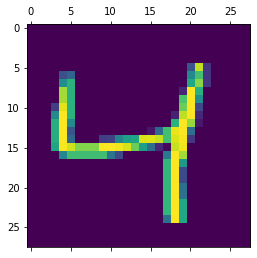

In [9]:
plt.matshow(X_train[2])

In [10]:
y_train[2]

4

here we can see that we have 0-9 digits

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
X_train.shape

(60000, 28, 28)

as we can see above that it is 2 dimension array for model training we have to convert it in singal dimension by using flatten.

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


After applying flatten now the np array is converted in singal dimension array with 28*28= 784 pixel

In [14]:
X_train_flattened.shape

(60000, 784)

In [15]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

# Implementation of simple Neural Network without hidden layer

In [16]:
#simple neural network with no hidden layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') # inputlayer contains ==748 samples and output =10 value
])

# sparese==because the output variable is int value
# categorical== because we have 10 classes to classify 0-9

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5) # epochs=== iteration =5

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.5929 - accuracy: 0.8432
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.0898 - accuracy: 0.8794
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.7560 - accuracy: 0.8819: 0s - loss: 5.7516 - 
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5957 - accuracy: 0.8846: 0s - loss: 5.6073 - ac
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3259 - accuracy: 0.8876


# simple neural network with no hidden layers

<img src="capture.png" width=1000 height=1000 />


In [19]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 965us/step - loss: 7.3320 - accuracy: 0.8484


[7.332028865814209, 0.8483999967575073]

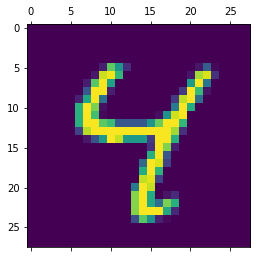

In [34]:
plt.matshow(X_test[6])

In [35]:
y_predicted = model.predict(X_test_flattened)
y_predicted[6]

array([6.9612265e-04, 4.2794658e-05, 1.4975667e-04, 3.3237547e-02,
       9.9718392e-01, 5.6913882e-01, 1.1064976e-02, 1.4642265e-01,
       7.9752851e-01, 7.3374116e-01], dtype=float32)

<h3> np.argmax finds a maximum element from an array and returns the index of it</h3>

In [37]:
np.argmax(y_predicted[6]) # argmax function is use to find out the maximum no 


4

In [38]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [40]:
y_predicted_labels[:5]  # converted the values in int


[7, 2, 1, 0, 4]

here above we are getting accuracy around 36 to 48 which is not good so lets try to do scaling 

In [27]:
X_train = X_train / 255
X_test = X_test / 255

In [28]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [29]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4734 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3048 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2840 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9251


<h3> As here we can clearly see that how much accuracy is improved by scaling</h3>

In [41]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels) 
cm
# building confusion matrix to check the actual and predicted values



<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    5,    9,    2,    2,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   7,   10,  906,   18,   10,    7,   13,   10,   48,    3],
       [   2,    0,   12,  914,    1,   34,    3,   10,   28,    6],
       [   2,    1,    2,    2,  919,    0,   13,    3,   11,   29],
       [   7,    2,    2,   25,    8,  798,   14,    2,   29,    5],
       [   9,    3,    3,    1,    7,   15,  915,    2,    3,    0],
       [   1,    6,   19,    9,    8,    2,    0,  940,    6,   37],
       [   6,    5,    6,   17,    9,   31,   10,    6,  878,    6],
       [  11,    6,    1,   10,   30,   12,    0,   18,   10,  911]])>

lets convert into heatmap to clearly check the difference

Text(69.0, 0.5, 'Actual Values')

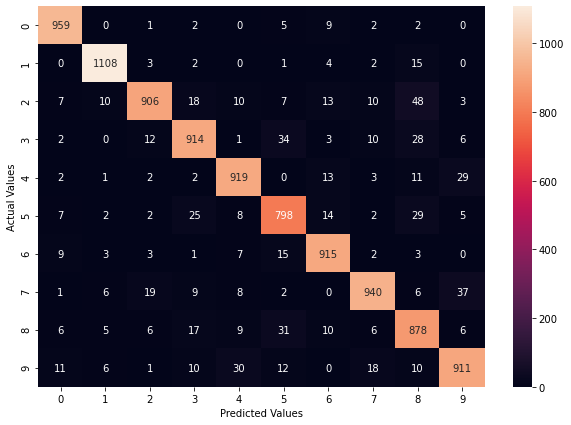

In [45]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

<h3> Above we have tried with simple neural network with and without scaling now appling hidden layer as well to check accuary</h3>

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2690 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1210 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9843


In [48]:
model.evaluate(X_test_flattened,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9770


[0.07484524697065353, 0.9769999980926514]

Text(69.0, 0.5, 'Actual Values')

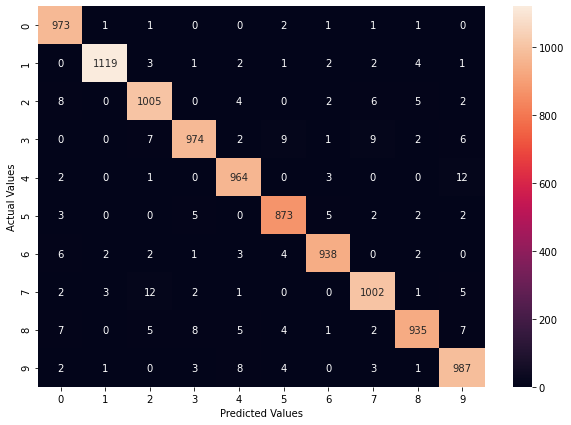

In [50]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
